<a href="https://colab.research.google.com/github/aa2314/FloodWarningSystem/blob/main/3F8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is the auxiliary code for the 3F8 coursework. Some parts are missing and
# should be completed by the student. These are Marked with XXX

# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

# We plot the data

import matplotlib.pyplot as plt

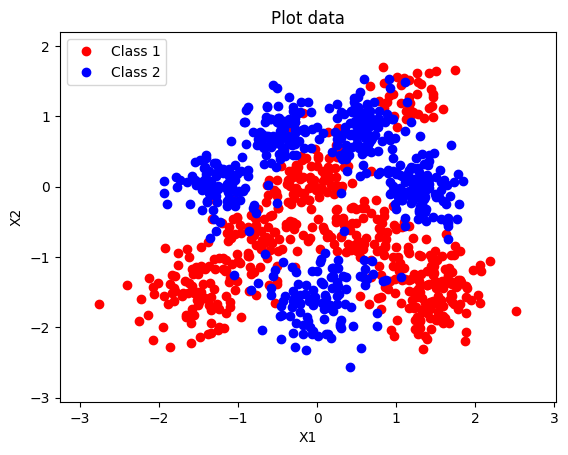

In [ ]:

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

plot_data(X, y)

# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

In [ ]:
##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left)
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left)
#         for which to make predictions
# y: vector of binary output labels
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left)
# y_train: vector of training binary output labels
# X_tile_test: matrix of test input features (with a constant 1 appended to the left)
# y_test: vector of test binary output labels
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output:
#
# 1 - Vector of model parameters w
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#


In [ ]:
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        w = w + alpha * np.dot((y_train -  sigmoid_value).T, X_tilde_train) # XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

-1.187219858118781 -1.1994675104446082
-1.0040002244552226 -1.002762955724093
-0.86153237153476 -0.8511092377671652
-0.7625417600286911 -0.7471199288316057
-0.701643137067337 -0.6845594310041092
-0.6674961737119842 -0.6507351640132479
-0.6491059582642472 -0.6334951336063953
-0.6391793343757691 -0.6248953149974831
-0.6336925033482433 -0.6206368188621287
-0.6305633372726811 -0.6185509245231189
-0.6287193025607644 -0.6175570482556285
-0.6275970905640211 -0.6171120586290916
-0.6268927195235263 -0.6169395421163466
-0.6264374181038024 -0.6168976600250402
-0.6261348499489934 -0.6169136658811659
-0.6259285419837767 -0.6169507671936957
-0.6257845282656244 -0.6169910134720196
-0.625681862732936 -0.617026312256357
-0.6256073081617213 -0.6170536575496725
-0.6255522959152967 -0.6170725816628183
-0.6255111483567272 -0.617083797424061
-0.6254800180570012 -0.6170884838259613
-0.6254562419132051 -0.6170879209719282
-0.6254379399464512 -0.617083314225179
-0.625423761036962 -0.6170757197166046
-0.6254127

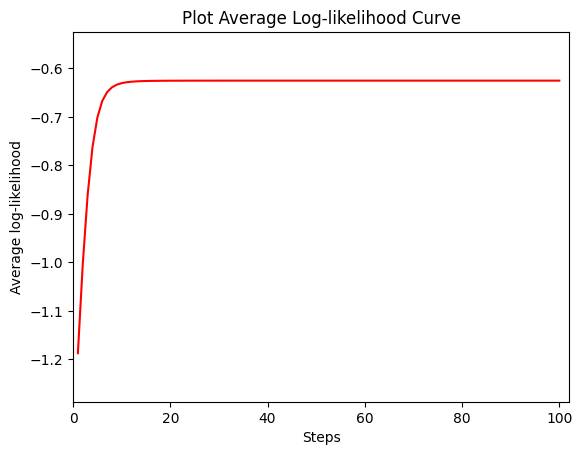

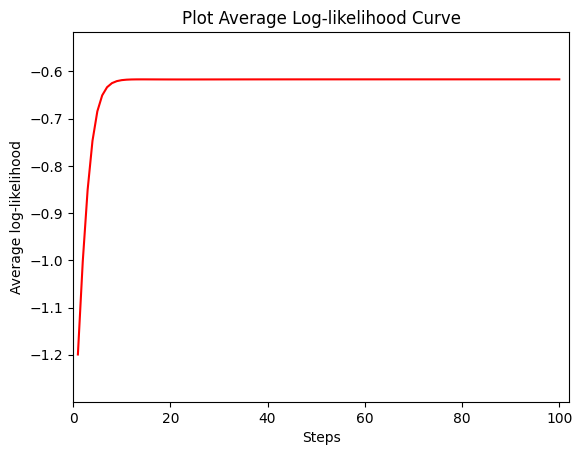

In [ ]:
# We train the classifier

alpha = 0.001# XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 100# XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

In [ ]:
pred = predict(X_tilde_test, w)
y_hat = []
for prediction in pred:
  if prediction > 0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)

In [ ]:
tp = 0 #true positive counter
tn = 0 #true negative counter
fp = 0 #false positive counter
fn = 0 #false negative counter
for y_hat_val, y_test_val in zip(y_hat, y_test):
  if y_hat_val == 0 and y_test_val == 0:
    tn += 1
  elif y_hat_val == 0 and y_test_val == 1:
    fn += 1
  elif y_hat_val == 1 and y_test_val == 0:
    fp += 1
  else:
    tp += 1
totfalse = tn + fp
tottrue = fn + tp
# create the confusion matrix C:
C = np.empty((2,2))
C[0,0] = tn / totfalse
C[0,1] = fp / totfalse
C[1,0] = fn / tottrue
C[1,1] = tp / tottrue
C

array([[0.7745098 , 0.2254902 ],
       [0.33673469, 0.66326531]])

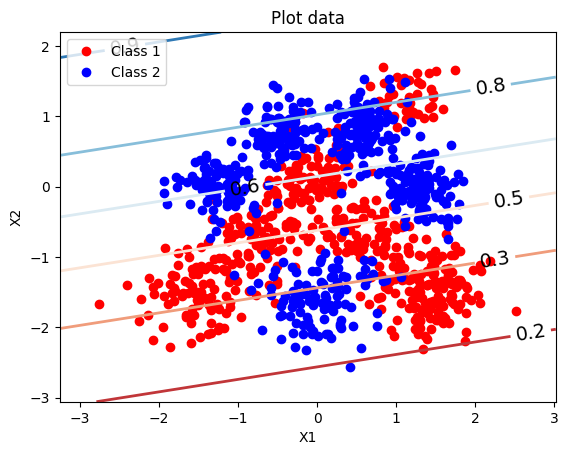

-0.8957604064779858 -0.8086616597492224
-0.8924879668440557 -0.8050817564197916
-0.889306704963547 -0.8016048767103356
-0.8862144659600705 -0.7982286529860164
-0.883209122579287 -0.7949507406430407
-0.8802885762271627 -0.7917688197474756
-0.877450757909773 -0.7886805965529621
-0.8746936290779976 -0.7856838049000514
-0.8720151823805563 -0.7827762075001357
-0.8694134423289023 -0.7799555971071824
-0.8668864658775602 -0.7772197975806583
-0.8644323429235155 -0.7745666648432025
-0.862049196728293 -0.7719940877367307
-0.8597351842663562 -0.7694999887807643
-0.8574884965034435 -0.7670823248368538
-0.8553073586084321 -0.7647390876830252
-0.8531900301022752 -0.7624683045022104
-0.851134804947508 -0.7602680382886362
-0.849140011581753 -0.7581363881761439
-0.8472040128985822 -0.7560714896923895
-0.8453252061790195 -0.7540715149428371
-0.8435020229768745 -0.7521346727284068
-0.8417329289610109 -0.7502592086005819
-0.8400164237175554 -0.7484434048576953
-0.8383510405149538 -0.7466855804860478
-0.836

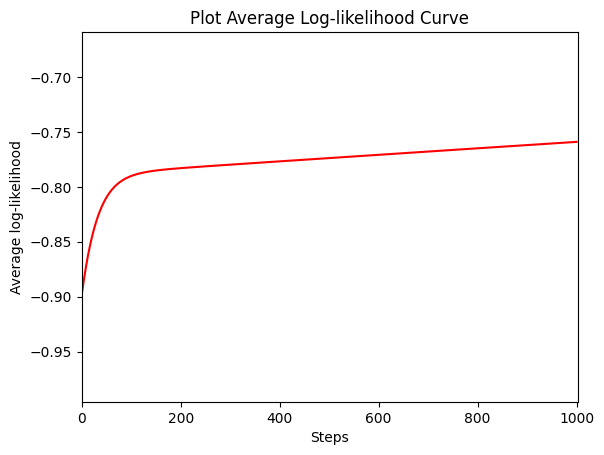

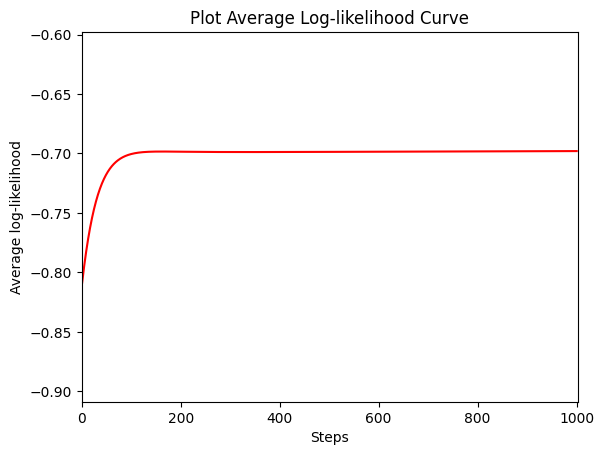

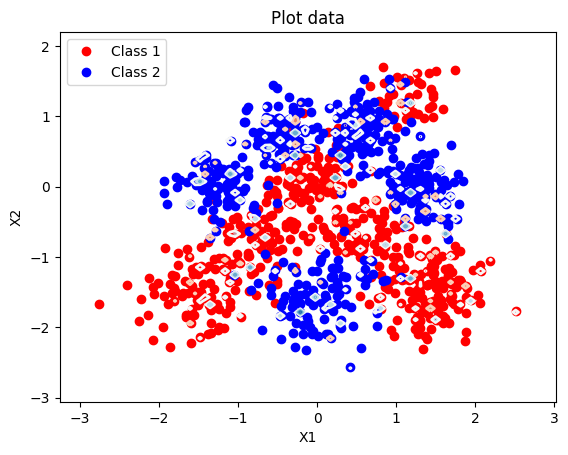

In [ ]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

# We expand the data

l = 0.01# XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.0001
n_steps = 1000

w_2, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w_2, lambda x : evaluate_basis_functions(l, x, X_train))

In [ ]:
pred = predict(X_tilde_test, w_2)
y_hat = []
for prediction in pred:
  if prediction > 0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)

In [ ]:
tp = 0 #true positive counter
tn = 0 #true negative counter
fp = 0 #false positive counter
fn = 0 #false negative counter
for y_hat_val, y_test_val in zip(y_hat, y_test):
  if y_hat_val == 0 and y_test_val == 0:
    tn += 1
  elif y_hat_val == 0 and y_test_val == 1:
    fn += 1
  elif y_hat_val == 1 and y_test_val == 0:
    fp += 1
  else:
    tp += 1
totfalse = tn + fp
tottrue = fn + tp
# create the confusion matrix C:
C = np.empty((2,2))
C[0,0] = tn / totfalse
C[0,1] = fp / totfalse
C[1,0] = fn / tottrue
C[1,1] = tp / tottrue
C

array([[0.92156863, 0.07843137],
       [0.1122449 , 0.8877551 ]])